## How does modeled ERA5 climate data compare to SNOTEL and SnowEx measurements?   

### Variables of interest:

- 2m_temperature
- snow_albedo
- snow_density
- snow_depth
- snow_depth_water_equivalent
- temperature_of_snow_layer
- total_precipitation   


In this example we will pull in the [ERA5-Land hourly data from 1981 to present](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=form)  

<p align="center">
<img src="https://datastore.copernicus-climate.eu/c3s/published-forms/c3sprod/reanalysis-era5-land/overview.png" width=300>   
</p>

| DATA DESCRIPTION  |  |
| ------------- | ------------- |
| **Data type**  | Gridded |
| **Projection**  | Regular latitude-longitude grid |
| **Horizontal coverage**  | Global |
| **Horizontal resolution**  | 0.1° x 0.1°; Native resolution is 9 km. |
| **Vertical coverage**  | From 2 m above the surface level, to a soil depth of 289 cm. |
| **Vertical resolution**  | 4 levels of the ECMWF surface model: Layer 1: 0 -7cm, Layer 2: 7 -28cm, Layer 3: 28-100cm, Layer 4: 100-289cm Some parameters are defined at 2 m over the surface. |
| **Temporal coverage**  | January 1981 to present |
| **Temporal resolution**  | Hourly |
| **File format**  | GRIB / NetCDF |
| **Update frequency**  | Monthly with a delay of about three months relatively to actual date. |    

 
Additional products and documentation can be found here:   
[ERA5-Land: documentation](https://confluence.ecmwf.int/display/CKB/ERA5-Land%3A+data+documentation)      
[ERA5-Land monthly averaged data from 1981 to present](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land-monthly-means?tab=form)     
[ERA5 monthly averaged data on pressure levels from 1950 to 1978 (preliminary version)](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels-monthly-means-preliminary-back-extension?tab=overview)    
[ERA5 hourly data on pressure levels from 1950 to 1978 (preliminary version)](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels-preliminary-back-extension?tab=overview)    


### Install cdsapi
`cdsapi` can be installed with pip.   
https://pypi.org/project/cdsapi/    
Be sure to set your credentials in ~/.cdsapirc   

In [3]:
# !pip install -q cdsapi

In [4]:
import cdsapi

In [5]:
c = cdsapi.Client()

### cdsapi API query
Format: NetCDF
Variables:
- 2m_temperature
- snow_albedo
- snow_density
- snow_depth
- snow_depth_water_equivalent
- temperature_of_snow_layer
- total_precipitation   

Time range: Hourly data for February 2020  
Bounds: [39.2, -108.4, 38.8, -107.7]

In [6]:
# c.retrieve(
#     'reanalysis-era5-land',
#     {
#         'format': 'netcdf',
#         'variable': [
#             '2m_temperature', 'snow_albedo', 'snow_density',
#             'snow_depth', 'snow_depth_water_equivalent', 'temperature_of_snow_layer',
#             'total_precipitation',
#         ],
#         'year': '2020',
#         'month': [
#             '01', '02', '03',
#         ],
#         'day': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#             '13', '14', '15',
#             '16', '17', '18',
#             '19', '20', '21',
#             '22', '23', '24',
#             '25', '26', '27',
#             '28', '29', '30',
#             '31',
#         ],
#         'time': [
#             '00:00', '01:00', '02:00',
#             '03:00', '04:00', '05:00',
#             '06:00', '07:00', '08:00',
#             '09:00', '10:00', '11:00',
#             '12:00', '13:00', '14:00',
#             '15:00', '16:00', '17:00',
#             '18:00', '19:00', '20:00',
#             '21:00', '22:00', '23:00',
#         ],
#         'area': [
#             39.2, -108.4, 38.8,
#             -107.7,
#         ],
#     },
#     'data/era5_2020-02-01_2020-02-29.nc')

### Read in the data

In [7]:
import xarray as xr
import numpy as np

In [8]:
ds = xr.open_dataset('data/era5_2020-02-01_2020-02-29.nc')

In [9]:
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 8, time: 696)
Coordinates:
  * longitude  (longitude) float32 -108.4 -108.3 -108.2 ... -107.9 -107.8 -107.7
  * latitude   (latitude) float32 39.2 39.1 39.0 38.9 38.8
  * time       (time) datetime64[ns] 2020-02-01 ... 2020-02-29T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    asn        (time, latitude, longitude) float32 ...
    rsn        (time, latitude, longitude) float32 ...
    sde        (time, latitude, longitude) float32 ...
    sd         (time, latitude, longitude) float32 ...
    tsn        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-15 17:43:31 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...


### Check units and variable names

In [10]:
for variable in list(ds.keys()):
    name = ds[variable ].attrs['long_name']
    units = ds[variable ].attrs['units']
    print('('+variable+')', name)
    print('units:', units, '\n')

(t2m) 2 metre temperature
units: K 

(asn) Snow albedo
units: (0 - 1) 

(rsn) Snow density
units: kg m**-3 

(sde) Snow depth
units: m 

(sd) Snow depth
units: m of water equivalent 

(tsn) Temperature of snow layer
units: K 

(tp) Total precipitation
units: m 



### Convert Kelvin to Celcius

In [11]:
ds['t2m'].values = ds['t2m'].values - 273.15
ds['t2m'].attrs['units'] = 'C'
ds['t2m'].attrs['long_name'] = 'Temperature (2 m above surface)'

### Convert from GMT to Mountain Time

In [12]:
ds['time'] = [t - np.timedelta64(6, 'h') for t in ds['time'].values]

### Plot a time series

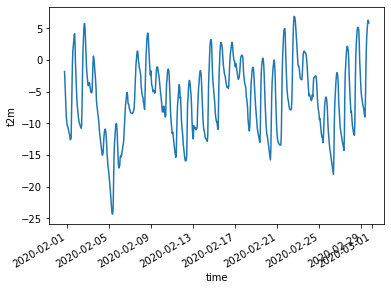

In [13]:
ds['t2m'].mean(dim=('latitude', 'longitude')).plot()

### Plot data from first time stamp

In [14]:
import matplotlib.pyplot as plt

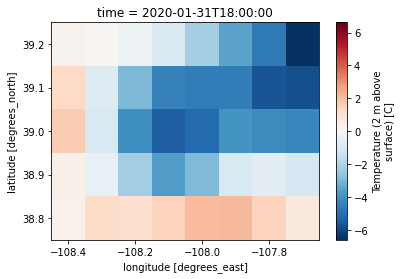

In [15]:
ds['t2m'].isel(time=0).plot()

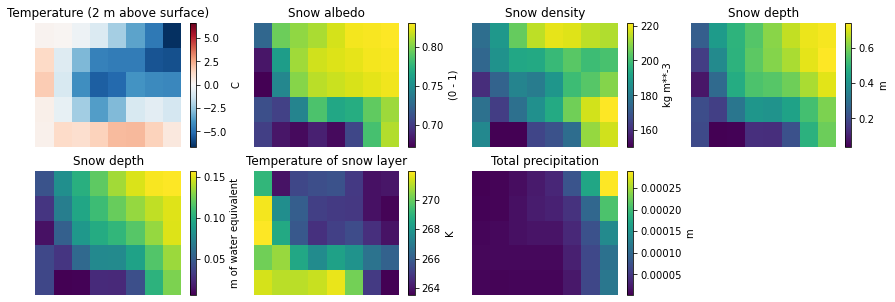

In [10]:
fig = plt.figure(figsize=(15,5))
variables = list(ds.keys())
rows = 2
columns = 4

for i in range(rows*columns):
    try:
        exists = ds[variables[i]]
        ax = plt.subplot(rows, columns, i + 1)
        name = ds[variables[i]].attrs['long_name']
        units = ds[variables[i]].attrs['units']
        ds[variables[i]].isel(time=0).plot(ax=ax,cbar_kwargs={'label':units})
        ax.axis('off')
        ax.set_title(name)
        
    except:
        pass


### Where is the Mesa?

In [16]:
import geopandas as gpd
import contextily as ctx
import pandas as pd

In [17]:
mesa_outline = gpd.read_file('data/grand_mesa_poly.geojson')

Text(0.5, 1.0, 'Grand Mesa outline and temperature at 2020-01-31:18:00:00')

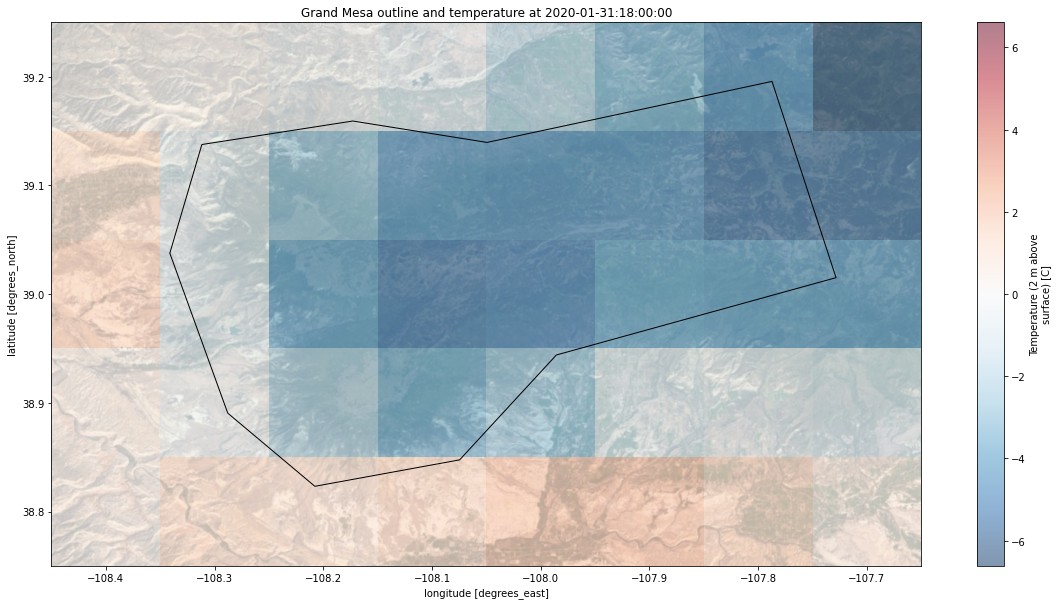

In [18]:
fig,ax = plt.subplots(figsize=(20,10))

ds['t2m'].isel(time=0).plot(ax = ax,alpha=0.5)
mesa_outline.plot(ax = ax,ec='k',fc='none')

time_stamp_string = pd.to_datetime(str(ds['time'].values[0])).strftime('%Y-%m-%d:%H:%M:%S')

ctx.add_basemap(ax,
                alpha=0.5,
                crs = mesa_outline.crs,
                zorder=-1,
                source = "https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}")

ax.set_title('Grand Mesa outline and temperature at '+time_stamp_string)

## Compare with SNOTEL
Variables to compare

- 2m_temperature
- snow_albedo
- snow_density
- snow_depth
- snow_depth_water_equivalent
- temperature_of_snow_layer
- total_precipitation



### Get sites over Grand Mesa
From https://snowex-hackweek.github.io/website/tutorials/geospatial/SNOTEL_query.html

In [22]:
!pip install -q git+https://github.com/ulmo-dev/ulmo.git

In [23]:
import ulmo
from shapely.geometry import Point

In [27]:
# wsdlurl = 'http://hydroportal.cuahsi.org/Snotel/cuahsi_1_1.asmx?WSDL'
# sites = ulmo.cuahsi.wof.get_sites(wsdlurl)
# sites_df = pd.DataFrame.from_dict(sites, orient='index').dropna()
# sites_df['geometry'] = [Point(float(loc['longitude']), float(loc['latitude'])) for loc in sites_df['location']]
# sites_df = sites_df.drop(columns='location')
# sites_df = sites_df.astype({"elevation_m":float})
# sites_gdf_all = gpd.GeoDataFrame(sites_df, crs='EPSG:4326')
# idx = sites_gdf_all.intersects(mesa_outline.iloc[0].geometry)
# gm_snotel_sites = sites_gdf_all.loc[idx]

# gm_snotel_sites.to_pickle('gm_snotel_sites.pk')

In [30]:
gm_snotel_sites = pd.read_pickle('gm_snotel_sites.pk')

### Plot on map

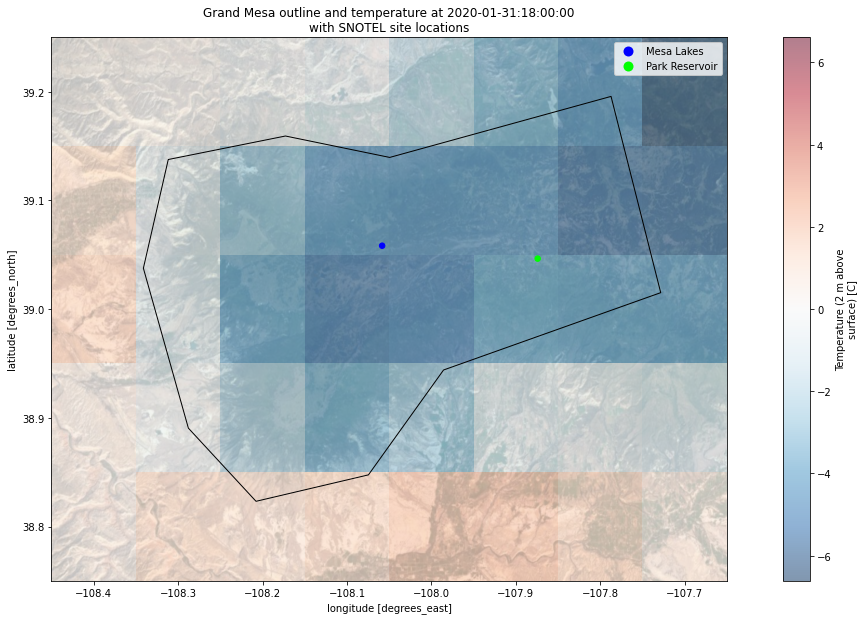

In [31]:
fig,ax = plt.subplots(figsize=(20,10))

ds['t2m'].isel(time=0).plot(ax = ax,alpha=0.5)
mesa_outline.plot(ax = ax,ec='k',fc='none')

time_stamp_string = pd.to_datetime(str(ds['time'].values[0])).strftime('%Y-%m-%d:%H:%M:%S')

ctx.add_basemap(ax,
                alpha=0.5,
                crs = mesa_outline.crs,
                zorder=-1,
                source = "https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}")

ax.set_title('Grand Mesa outline and temperature at '+time_stamp_string + '\nwith SNOTEL site locations')

gm_snotel_sites.plot(ax=ax, column='name',
                     markersize=30, categorical=True, legend=True,cmap='brg');

### Check what hourly variables are available

In [32]:
sitecode = gm_snotel_sites.index[-1]
variable_dictionary = ulmo.cuahsi.wof.get_site_info(wsdlurl, sitecode)['series']

In [33]:
for k in variable_dictionary.keys():
    if '_H' in k:
        print(k, variable_dictionary[k]['variable']['name'])

SNOTEL:BATT_H Battery voltage
SNOTEL:BATX_H Battery voltage
SNOTEL:SNWD_H Snow depth
SNOTEL:TOBS_H Temperature
SNOTEL:WTEQ_H Snow water equivalent


#### Pull in SWE, Snow Depth, and Temperature at both sites

In [34]:
# start_date='2020-02-01'
# end_date='2020-02-29'
# variables = ['SNOTEL:SNWD_H', 'SNOTEL:TOBS_H', 'SNOTEL:WTEQ_H']
# variable_names = ['snow_depth', 'temperature', 'swe']

# sitecode = gm_snotel_sites.index[0]

# for i,v in enumerate(variables):
#     site_values = ulmo.cuahsi.wof.get_values(wsdlurl, sitecode, v, start=start_date, end=end_date)
#     values_df = pd.DataFrame.from_dict(site_values['values'])
#     values_df['datetime'] = pd.to_datetime(values_df['datetime'], utc=True)
#     values_df = values_df.set_index('datetime',drop=True)
#     values_df['value'] = pd.to_numeric(values_df['value']).replace(-9999, np.nan)
#     values_df = values_df[values_df['quality_control_level_code'] == '1']
#     values_df[variable_names[i]] = values_df[['value']]
#     values_df = pd.DataFrame(values_df[variable_names[i]])
#     values_df = pd.DataFrame(values_df[variable_names[i]])
#     try:
#         df = pd.concat([values_df, df],axis=1)
#     except:
#         df = values_df

# SNOTEL_mesa_lakes_df = df.copy()
# del df

# sitecode = gm_snotel_sites.index[1]

# for i,v in enumerate(variables):
#     site_values = ulmo.cuahsi.wof.get_values(wsdlurl, sitecode, v, start=start_date, end=end_date)
#     values_df = pd.DataFrame.from_dict(site_values['values'])
#     values_df['datetime'] = pd.to_datetime(values_df['datetime'], utc=True)
#     values_df = values_df.set_index('datetime',drop=True)
#     values_df['value'] = pd.to_numeric(values_df['value']).replace(-9999, np.nan)
#     values_df = values_df[values_df['quality_control_level_code'] == '1']
#     values_df[variable_names[i]] = values_df[['value']]
#     values_df = pd.DataFrame(values_df[variable_names[i]])
#     values_df = pd.DataFrame(values_df[variable_names[i]])
#     try:
#         df = pd.concat([values_df, df],axis=1)
#     except:
#         df = values_df

# SNOTEL_park_reservoir_df = df.copy()
# del df

### Convert to SI units

In [35]:
# SNOTEL_mesa_lakes_df['temperature'] = [((x-32) * (5/9)) for x in SNOTEL_mesa_lakes_df['temperature'].values]
# SNOTEL_mesa_lakes_df['swe'] = [(x/39.37) for x in SNOTEL_mesa_lakes_df['swe'].values]
# SNOTEL_mesa_lakes_df['snow_depth'] = [(x/39.37) for x in SNOTEL_mesa_lakes_df['snow_depth'].values]

# SNOTEL_park_reservoir_df['temperature'] = [((x-32) * (5/9)) for x in SNOTEL_park_reservoir_df['temperature'].values]
# SNOTEL_park_reservoir_df['swe'] = [(x/39.37) for x in SNOTEL_park_reservoir_df['swe'].values]
# SNOTEL_park_reservoir_df['snow_depth'] = [(x/39.37) for x in SNOTEL_park_reservoir_df['snow_depth'].values]


In [36]:
# SNOTEL_mesa_lakes_df.to_pickle('SNOTEL_mesa_lakes_df.pk')
# SNOTEL_park_reservoir_df.to_pickle('SNOTEL_park_reservoir_df.pk')

In [37]:
SNOTEL_mesa_lakes_df = pd.read_pickle('SNOTEL_mesa_lakes_df.pk')
SNOTEL_park_reservoir_df = pd.read_pickle('SNOTEL_park_reservoir_df.pk')

<AxesSubplot:xlabel='datetime'>

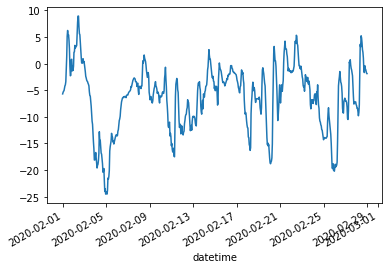

In [38]:
SNOTEL_mesa_lakes_df['temperature'].plot()

<AxesSubplot:xlabel='datetime'>

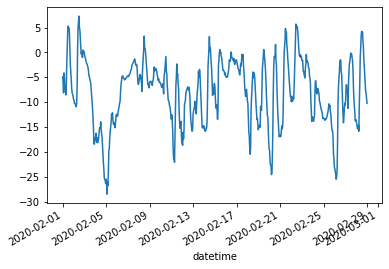

In [39]:
SNOTEL_park_reservoir_df['temperature'].plot()

### Sample ERA5 dataset at SNOTEL locations

In [40]:
SNOTEL_mesa_lakes_coords = [gm_snotel_sites.iloc[0].geometry.x,gm_snotel_sites.iloc[0].geometry.y]
SNOTEL_park_reservoir_coords = [gm_snotel_sites.iloc[1].geometry.x,gm_snotel_sites.iloc[1].geometry.y]

In [41]:
era5_at_mesa_lakes = ds.interp(latitude=SNOTEL_mesa_lakes_coords[1], 
                               longitude=SNOTEL_mesa_lakes_coords[0], 
                               method="cubic")

era5_at_park_reservoir = ds.interp(latitude=SNOTEL_park_reservoir_coords[1], 
                                   longitude=SNOTEL_park_reservoir_coords[0], 
                                   method="cubic")

### Compare to ERA5

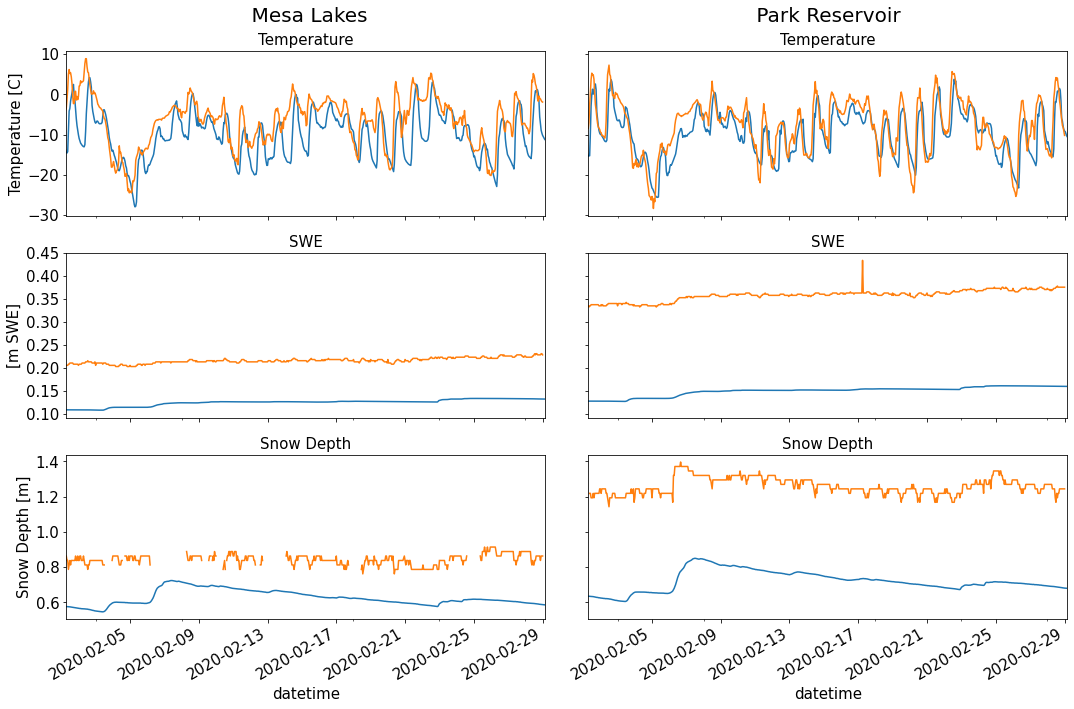

In [80]:
fig, axes = plt.subplots(3,2, figsize=(15,10), sharex=True, sharey='row')

era5_at_mesa_lakes['t2m'].plot(ax=axes[0][0])
era5_at_mesa_lakes['sd'].plot(ax=axes[1][0])
era5_at_mesa_lakes['sde'].plot(ax=axes[2][0])

era5_at_park_reservoir['t2m'].plot(ax=axes[0][1])
era5_at_park_reservoir['sd'].plot(ax=axes[1][1])
era5_at_park_reservoir['sde'].plot(ax=axes[2][1])

SNOTEL_mesa_lakes_df['temperature'].plot(ax=axes[0][0])
SNOTEL_mesa_lakes_df['swe'].plot(ax=axes[1][0])
SNOTEL_mesa_lakes_df['snow_depth'].plot(ax=axes[2][0])

SNOTEL_park_reservoir_df['temperature'].plot(ax=axes[0][1])
SNOTEL_park_reservoir_df['swe'].plot(ax=axes[1][1])
SNOTEL_park_reservoir_df['snow_depth'].plot(ax=axes[2][1])


axes[0][0].set_title('Temperature',size=20)
axes[1][0].set_title('SWE',size=20)
axes[2][0].set_title('Snow Depth',size=20)
axes[0][1].set_title('Temperature',size=20)
axes[1][1].set_title('SWE',size=20)
axes[2][1].set_title('Snow Depth',size=20)


axes[0][0].set_ylabel('Temperature [C]')
axes[1][0].set_ylabel('[m SWE]')
axes[2][0].set_ylabel('Snow Depth [m]')

axes[2][1].set_xlim(axes[2][1].get_xlim()[0]+2, axes[2][1].get_xlim()[1]-2)

for i in [0,1,2]:
    for ax in axes[i]:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                     ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(15)
    
plt.suptitle('            Mesa Lakes                                                             Park Reservoir',size=20)
plt.tight_layout()

### Pull in met station temperature data

In [14]:
from snowexsql.db import get_db

In [15]:
db_name = 'snow:hackweek@52.32.183.144/snowex'

In [16]:
engine, session = get_db(db_name)

In [17]:
from snowexsql.data import SiteData, PointData, LayerData, ImageData

In [23]:
qry = session.query(PointData).limit(10)

In [24]:
result = qry.all()

In [26]:
result[0]

### Plot met stations on map

### Sample ERA5 at met stations

### Pull in snow depths from SNOTEL sites

#### Pull in CSNOW Sentinel 1 snow depths